## Теоретическая часть


1. Ответьте на вопросы:  
В чем принципиальное отличие гибридных рекомендательных систем от коллаборативной филтьтрации?  
Приведите 2-3 примера задач, в которых необходимо использовать гибридные системы  




Колоборативная фильтрация основана на истории оценок пользователей. Учитывается активное взаимодействие с товаром - анализируется то, что понравилось пользователю, рекомендации----> похожие товары, -----> товары, которые понравились другим пользователям с похожими вкусами.

Гибридные РС объединяют в себе принципы колаборативной фильтрации в объединении с принципами контентных РС, основанных на знаниях о товаре и о пользователе (item-based, user-based) .т.е. является более комплексным подходом и опирается не только на активное взаимодействие, но и собранные фичи. Гибридные РС были созданы для того чтобы использовать сильные стороны различных алгоритмов и минимизировать ущерб от их недостатков.

Гибридные системы позволяют решить проблему «холодного старта», которая является одним из слабых мест методов коллаборативной фильтрации - новые пользователи, новые товары. С помочщью гибридной модели для «холодного пользователя», предпочтения которого нам неизвестны и у которого нет активног овзаимодействия с товарами, мы можем рекомендовать, например, наиболее популярные товары или подготовить «универсальный» набор рекомендаций. Таким оразом, наиболее оптимальным будет применение гибридных РС в условиях необходимости делать рекомендации для "холодных юзеров" или использовать для рекомендаций новые товары.

2.  Прочитайте статью про поиск на hh.ru https://habr.com/ru/company/hh/blog/347276/
Нам интересна именно рекомендательная система, раздел "Производительность системы" можно пропустить
Какие основные отличия предложенной системы от тех подходов, которые мы разбирали на семинарах? Какие проблемы могут возникнуть при выводе такой модели в продакшен?

В кратце суть РС:
1. Для пустых поисковых запросов пользователей с резюме - использование ранга от рекомендательной системы + ранжирование и ограничение в выдаче по релевантности - сначала демонстрируется топ релевантных для каждой группы вакансий, потом вакансии из всег групп с меньшей релевантностью. Цель, чтоб все группы вакансий попали в выдачу в соответствии со своей релевантностью. 
На примерах из семинаров не было такой задачи - мы просто рекомендовали топы по релевантности без обязательной привязки к тому, в какой группе они находятся.

2. Поиск по непустому запросу - использование многоступенчатой модели, которая отсеивает наименее релевантные на каждом этапе и улучшает показатели для оставшихся на следующем: Линейная модель - грубый фильтр для неподходящих по ключевым словам вакансий ----> XGBoost для качественного ранжирования подходящих по релевантности. Для настройки использовали метрики ndcg и map.

Как я поняла HH не использует item-based, user-based подход. Они анализируют соответствие вакансий на основании данных только одного пользвателя (резюме), его запросов и откликов. Кроме имеющихся стандартных признаков они добавили признаки, сравнивающие тексты с учётом текстовых взаимодействий. Добавили time-based-валидации для исключения переобучения моделей. Сделали разметку вакансий для наиболее высокочастотных запросов. Кроме того они создали framework для удобной работы с кодом, признаками и моделями. 

Вывод модели в продакшн нужно делать по частями и постепенно, чтобы запускать а/б тесты и вовремя понять, если что-то вызывает отрицательный эффект. Как и в любых РС, отрицателный эффект - это потеря денег или трафика. Демонстрация нерелевантных вакансий или отсутствие каких-то групп вакансий в рекомендательной выдаче существенно снижают количество просмотров и конверсию показов в отклики. Большую роль играет визуализация. Ну и конечно при создании РС, которая должна отлично искалть то, что постоянно меняется, невозможно без внесения в нее постоянных изменений - т.е. РС ХХ - это не событие, а процесс, постоянное усовершенствование и поддержка.

3. На вебинаре мы рассматривали модель LightFM (https://making.lyst.com/lightfm/docs/lightfm.html). В работе Data Scientist'а важную часть занимает research - исследование существующих архитектур и разбор научных статей, в которых они описываются. Вам предлагается изчуть оригинальную статью про LightFM https://arxiv.org/pdf/1507.08439.pdf и ответить на следующие вопросы:  
1) Какой датасет используют авторы?  
2) Что используют в качестве признаков?  
3) С какими моделями сравнивают LightFM? Опишите их основные идеи кратко  

Статья написана разработчиками Lyst - это интернет магазин фэшн одежды.
Главные проблемы: большое количество атикулов, которое каждый день растет; постоянные изменения в мире моды и выпуск новых коллекций, что тоже нужно учитывать в рекомендациях; большое количество новых "холодных" пользователей.

Для построения модели они учитывают взаимодействия юзеров с товарами (положительные и отрицательные), фичи товаров и юзеров (метаданные), а также скалярные смещения.

LightFM сравнивают со стандартной матричной факторизацией, content-based моделью, которые плохо справляются в случаях рекомендаций холодного старта - для новых пользователей и новых товаров - при отсутствии достаточного количства данных для нализа и сравнения. В то время как обычные колаборативные модели хорошо справляются там, где имеются наполненные данными эмбединги юзеров и товаров, LightFM дает возможность использовать метаданные там, где информации о взаимодействии юзер-товар недостаточно, делая предсказание для рекомендаций в случаях холодного запуска.

В статье также описывается ряд связанных гибридных моделей:
Soboroff - представляет пользователей как линейные комбинации векторов признаков предметов, с которыми они взаимодействовали, затем с помощью семантической индексации формируют скрытые профили пользователей. 
Saveski - использует факторизацию user-item и item-feature матриц, используя одну матрицу признаков товаров в обоих разложениях, используя в качестве оптимизации гиперпараметр веса (минимизация взвешенной суммы матриц).
Shmueli - представляет товары как линейные комбинаци их признаков, использует метаданные и данные других пользователей, но эта модель более эффективна для холоного запуска и малопроизводительна для работы с "горячими" данными.
LightFM имеет преимуществе перед всеми этими гибридными моделями, так как учитывает user-item, item-feature и user-feature матрицы.

Автор статьи оценивает производительность LightFM на двух наборах данных - плотный набор данных MovieLens и разреженные данные (CrossValidated).

MovieLens + Tag Genome- 71567 пользователей,  10681 фильмов с фичами и тэгами (0-1 - точнось описания) ----> рейтинг 1-3 негативное взаимодейстиве, рейтинг 4-5 позитивное, взяли только самые релевантные исходя из тегов ---->  итоговый набор данных содержит 69878 пользователей, 10681 фильмов, 9996948 взаимодействий и 1030 уникальных тегов.
 
CrossValidated вопрос-ответ - 5953 пользователей + их метадата, 44200 вопросов + 1032 уникальных тега, 188865 ответов и комментов -----> ответ на вопрос позитивное воздействие, отсутвие ответа негативное -----> для каждой позитивной пары с помощю randomly sampling найдено 3 негативных пары. Упор на желание пользователя ответить на вопрос, а не на его возможность сделать это. Задача - объединить пользователей и вопросы, на которые они могут дать ответ.

Трейн/ тест ----> теплые данные + холодные юзеры и товары.
Скор - ROC AUC.
Модели:
- MF - стандартная матричная факториязация юзер-товар
- LSI-LR - content-based модель -----> представление товаров как линейных комбинаций тем, полученных после семантической индексации матрицы item-feature -----> после логистическая регрессия для каждого юзера 
- LSI-UP - представляет профели юзеров как линейные комбинации товаров -----> семантическая индексация результирующей матрицы. Матрица user-feature состоит из векторов пользователей, в которых сложены веторы фичей товаров, с которым каждый пользователь имел положительное взаимодействие.  
- LightFM (tags) - только фичи тэгов
- LightFM (tags + ids) - фичи тэгов и товаров
- LightFM (tags + about) - для CrossValidated фичи тегов и юзеров.

Стохастический гадиентный спуск, начальная скорость обучения 0.05, критерий остановки - прекращение улучшения показателей.

Теплый старт 
- для MovieLens + Tag Genome показатель модели LightFM (tags + ids) выше, что значает, что использование метаданных может улучшить результат даже для датасетов с большим количеством информации о взаимодействии юзер-товар. Другие модели справились хожу, а LightFM (tags) примерно равна MF по производительности, хотя использует только метаданные.

- для CrossValidated LightFM (tags + about) показала лучший результат, MF очень низкий показатель, остальные модели чуть лучше.

Холодного запуск

Модели показали аналогичную статистику для холодного запуска.
LSI-LR показала себя лучше LSI-UP для всех случаев (предположительно потому что юзеров в датасете меньше, чем товаров).

Эбеддинги LightFM согут использоваться для большого количества рекомендательных задач.
Lyst использует LightFM в купе с поиском ближайших соседей (RP trees).

## Практическая часть


In [3]:
!pip install lightfm

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Для работы с матрицами
from scipy.sparse import csr_matrix, coo_matrix

# Матричная факторизация
from implicit.als import AlternatingLeastSquares
from implicit.nearest_neighbours import bm25_weight, tfidf_weight

from lightfm import LightFM
from lightfm.evaluation import precision_at_k, recall_at_k

# Функции из 1-ого вебинара
import os, sys

# module_path = os.path.abspath(os.path.join(os.pardir))
# if module_path not in sys.path:
#     sys.path.append(module_path)


### 1. Модуль SRC

На вебинаре было рассказано про модуль src. Он приложен в материалах. Скачайте его, изучите структуру, импортируйте функции

In [13]:
sys.path.append('C:/Users/sklod/OneDrive/Рабочий стол/STUDY/!Теория/Q4.Рекомендательные системы/src')
    
#from src.metrics import precision_at_k as precision_at_k_
#from src.metrics import recall_at_k as recall_at_k_
#from src.utils import prefilter_items

import utils
from utils import prefilter_items

In [54]:
data = pd.read_csv('C:/Users/sklod/OneDrive/Рабочий стол/STUDY/!Теория/Q4.Рекомендательные системы/retail_train.csv')
item_features = pd.read_csv('C:/Users/sklod/OneDrive/Рабочий стол/STUDY/!Теория/Q4.Рекомендательные системы/product.csv')
user_features = pd.read_csv('C:/Users/sklod/OneDrive/Рабочий стол/STUDY/!Теория/Q4.Рекомендательные системы/hh_demographic.csv')

# column processing
item_features.columns = [col.lower() for col in item_features.columns]
user_features.columns = [col.lower() for col in user_features.columns]

item_features.rename(columns={'product_id': 'item_id'}, inplace=True)
user_features.rename(columns={'household_key': 'user_id'}, inplace=True)

# train test split
test_size_weeks = 3

data_train = data[data['week_no'] < data['week_no'].max() - test_size_weeks]
data_test = data[data['week_no'] >= data['week_no'].max() - test_size_weeks]

data_train.head()

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [97]:
#Filter items - тестируем модуль src.prefilter_items

n_items_before = data_train['item_id'].nunique()

data_train = prefilter_items(data_train)

n_items_after = data_train['item_id'].nunique()
print('Decreased # items from {} to {}'.format(n_items_before, n_items_after))

Decreased # items from 86865 to 5001


In [98]:
data_test = prefilter_items(data_test)

### 2. Работа с признаками

У нас есть внешние данные. Что с ними не так? Чего не хватает?  

Проведите исследование внешних данных и составьте какие-нибудь содержательные выводы.  
Формально Вам нужно построить 3+ графиков (scatter plot, hist или что-то иное) и описать, что мы видим (например, товары такой-то категории болле часто покупаются в следующие дни недели или пользователи с большим достатком предпочитают такие-то товары).  
Исследуйте те закономерности, которые Вам интересно, чем менее тривиальный вывод получается, тем лучше! 

##### Сначала исследуем фичи товаров

In [17]:
item_features.head(5)

,item_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [18]:
item_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_id               92353 non-null  int64 
 1   manufacturer          92353 non-null  int64 
 2   department            92353 non-null  object
 3   brand                 92353 non-null  object
 4   commodity_desc        92353 non-null  object
 5   sub_commodity_desc    92353 non-null  object
 6   curr_size_of_product  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


In [28]:
item_features['manufacturer'].nunique()

6476

In [44]:
item_features['manufacturer'].value_counts() #очевиден большой разброс в данных, распределение неравномерное

69      12676
2        1411
5423     1376
764      1332
1407     1210
        ...  
659         1
5864        1
1770        1
2642        1
1887        1
Name: manufacturer, Length: 6476, dtype: int64

In [22]:
item_features['department'].nunique()

44

<function matplotlib.pyplot.show(*args, **kw)>

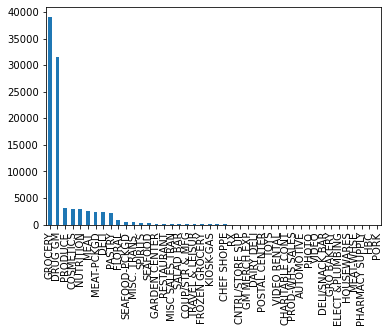

In [26]:
item_features['department'].value_counts().plot(kind='bar') #очевиден огромный разброс в данных, распределение неравномерное
plt.show

In [33]:
item_features['brand'].value_counts(normalize=True) #довольно мало товаров СТМ

National    0.8504
Private     0.1496
Name: brand, dtype: float64

In [35]:
item_features['commodity_desc'].nunique()

308

In [36]:
item_features['commodity_desc'].value_counts(normalize=True) #тоже большой разброс

GREETING CARDS/WRAP/PARTY SPLY    0.030156
CANDY - PACKAGED                  0.026799
MAKEUP AND TREATMENT              0.026713
HAIR CARE PRODUCTS                0.018884
SOFT DRINKS                       0.018451
                                    ...   
MISCELLANEOUS CROUTONS            0.000011
BOUQUET (NON ROSE)                0.000011
EASTER LILY                       0.000011
PKG.SEAFOOD MISC                  0.000011
FROZEN PACKAGE MEAT               0.000011
Name: commodity_desc, Length: 308, dtype: float64

In [39]:
item_features['sub_commodity_desc'].nunique()

2383

In [38]:
item_features['curr_size_of_product'].nunique()

4345

In [41]:
item_features['curr_size_of_product'].value_counts(normalize=True) # больше всего товаров с незаполненными габаритами

              0.331413
16 OZ         0.042489
12 OZ         0.037606
8 OZ          0.025587
6 OZ          0.018375
                ...   
23.04 OZ      0.000011
R     6 OZ    0.000011
11.75OZ       0.000011
16.50 OZ      0.000011
1444340CT     0.000011
Name: curr_size_of_product, Length: 4345, dtype: float64

In [43]:
item_features['curr_size_of_product'].isnull().value_counts() # но при этом пустое значение не считается пробелом в данных

False    92353
Name: curr_size_of_product, dtype: int64

##### Исследуем фичи пользователей

In [46]:
user_features.head()

,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,user_id
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [45]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age_desc             801 non-null    object
 1   marital_status_code  801 non-null    object
 2   income_desc          801 non-null    object
 3   homeowner_desc       801 non-null    object
 4   hh_comp_desc         801 non-null    object
 5   household_size_desc  801 non-null    object
 6   kid_category_desc    801 non-null    object
 7   user_id              801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [47]:
user_features['age_desc'].nunique()

6

<function matplotlib.pyplot.show(*args, **kw)>

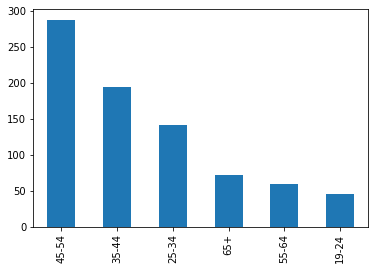

In [49]:
user_features['age_desc'].value_counts().plot(kind='bar') #юзеры в возарсте 45-54 совершают больше всего покупок
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

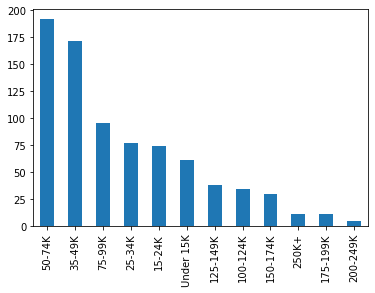

In [53]:
user_features['income_desc'].value_counts().plot(kind='bar')
plt.show

In [85]:
import seaborn as sns

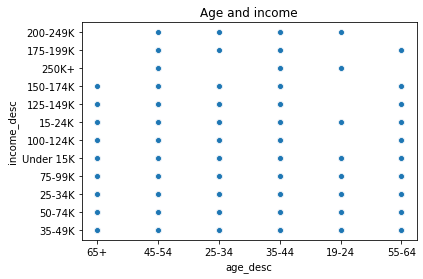

In [84]:
#ожидаемо, что пенсионеры имеют более низкий доход
sns.scatterplot(data=user_features, x='age_desc', y='income_desc')
#plt.xlabel('age_desc')
#plt.ylabel('income_desc')
plt.title('Age and income');

<function matplotlib.pyplot.show(*args, **kw)>

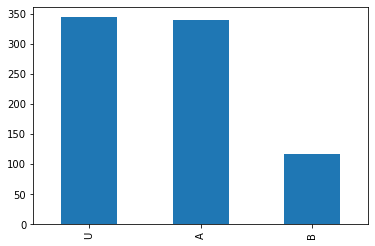

In [51]:
user_features['marital_status_code'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

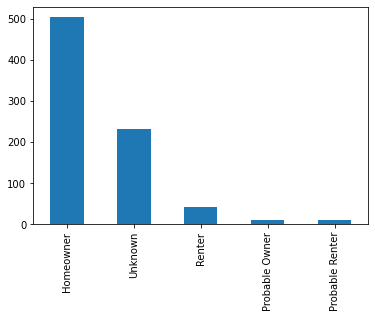

In [63]:
user_features['homeowner_desc'].value_counts().plot(kind='bar') #большой разброс по кол-вам
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

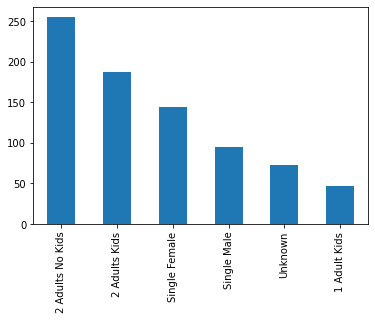

In [65]:
user_features['hh_comp_desc'].value_counts().plot(kind='bar') #
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

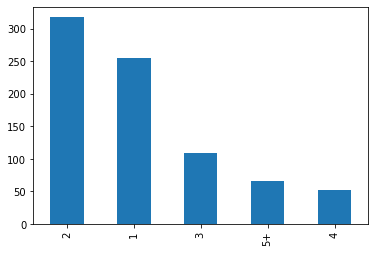

In [67]:
user_features['household_size_desc'].value_counts().plot(kind='bar') #
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

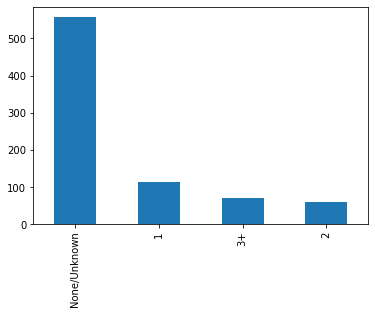

In [72]:
user_features['kid_category_desc'].value_counts().plot(kind='bar') #очень много неизвестных
plt.show

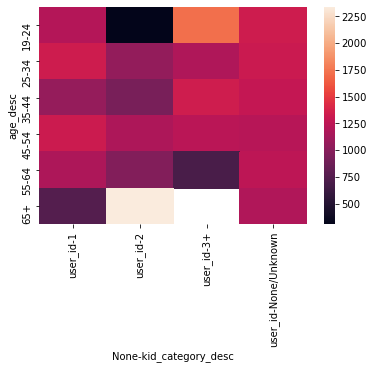

In [96]:
pivot = user_features.pivot_table(
    index=["age_desc"],
    columns=["kid_category_desc"],
    aggfunc=np.average)
sns.heatmap(pivot)

In [115]:
#исследуем закономерности
item_feat_research = data_train.merge(item_features, on='item_id', how='left')
item_feat_research.set_index('item_id', inplace=True)
item_feat_research.head(2)

,user_id,basket_id,day,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,price,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
item_id,,,,,,,,,,,,,,,,,,
1085983,2375,26984851516,1,1,2.99,364,-0.4,1642,1,0.0,0.0,2.99,586.0,GROCERY,National,COOKIES/CONES,TRAY PACK/CHOC CHIP COOKIES,18 OZ
999999,1364,26984896261,1,1,2.19,31742,0.0,1520,1,0.0,0.0,2.19,NaN,NaN,NaN,NaN,NaN,NaN


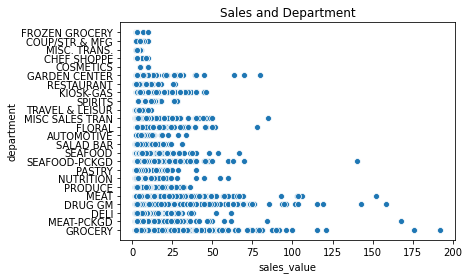

In [116]:
# очевидно, что не все категории товаров вошли в трэйновый датасет
# если сравнить с распределением товаров по категориям, то можно заметить, что не все наполненные категории дают хорошие продажи
# например Cosmetics в топах по количеству товаров, но на дне по sales_value
sns.scatterplot(data = item_feat_research, x='sales_value', y='department')
plt.title('Sales and Department');

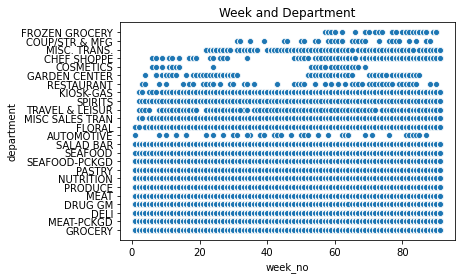

In [135]:
# очевидно, что некоторые категории товаров начали продаваться позже остальных - тоносительно новые
# некоторые категории имеют разрывы в продажах - или сезонность, или перебои в наличии товаров
# есть категории, которые продаются стабильно
sns.scatterplot(data = item_feat_research, x='week_no', y='department')
plt.title('Week and Department');

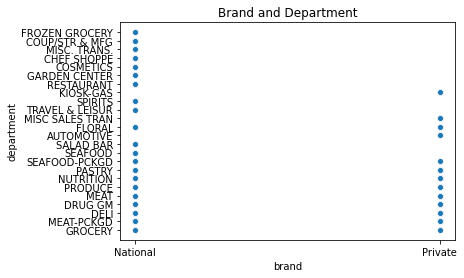

In [137]:
# получилось убого, но очевидно, что СТМ представлена не во всех группах товаров
sns.scatterplot(data = item_feat_research, x='brand', y='department')
plt.title('Brand and Department');

### 3. LightFM

У этого алогритма есть множество параметров (item/user_alpha, loss, no_components).  
Проведите эксперименты аналогично дз 3 (подберите гипперпараметры каким удобно способои и постройте графики)  
На выходе необходимо получить pr@5 на валидации (последние 3 недели) > 2%  

У Вас, скорее всего, возникнет проблема со временем обучения. Почему они возникает?    

Попробуйте запустить алгоритм вообще без фичей или используйте только признаки с небольшим числом уникальных категорий. (item_features['commodity_desc'].unique() - 300 уникальных категорий - это очень много)

In [99]:
#Prepare CSR train matrix

user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='quantity', # Можно пробоват ьдругие варианты
                                  aggfunc='count', 
                                  fill_value=0
                                 )

user_item_matrix = user_item_matrix.astype(float) # необходимый тип матрицы для implicit

# переведем в формат sparse matrix
sparse_user_item = csr_matrix(user_item_matrix)

In [100]:
#Prepare CSR test matrix

data_test = data_test[data_test['item_id'].isin(data_train['item_id'].unique())]

test_user_item_matrix = pd.pivot_table(data_test, 
                                  index='user_id', columns='item_id', 
                                  values='quantity', # Можно пробоват ьдругие варианты
                                  aggfunc='count', 
                                  fill_value=0
                                 )

test_user_item_matrix = test_user_item_matrix.astype(float) # необходимый тип матрицы для implicit

# переведем в формат sparse matrix
test_sparse_user_item = csr_matrix(test_user_item_matrix)

In [101]:
#готовим словарики
userids = user_item_matrix.index.values
itemids = user_item_matrix.columns.values

matrix_userids = np.arange(len(userids))
matrix_itemids = np.arange(len(itemids))

id_to_itemid = dict(zip(matrix_itemids, itemids))
id_to_userid = dict(zip(matrix_userids, userids))

itemid_to_id = dict(zip(itemids, matrix_itemids))
userid_to_id = dict(zip(userids, matrix_userids))

In [102]:
#Обработка доп признаков юзеров

user_feat = pd.DataFrame(user_item_matrix.index)
user_feat = user_feat.merge(user_features, on='user_id', how='left')
user_feat.set_index('user_id', inplace=True)
user_feat.head(2)

,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
user_id,,,,,,,
1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#Обработка доп признаков товаров
item_feat = pd.DataFrame(user_item_matrix.columns)
item_feat = item_feat.merge(item_features, on='item_id', how='left')
item_feat.set_index('item_id', inplace=True)

item_feat.head(2)

,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
item_id,,,,,,
117847,450.0,NUTRITION,National,REFRIGERATED,SOY/RICE MILK,64 OZ
279994,2.0,SALAD BAR,National,SALAD BAR,SALAD BAR FRESH FRUIT,


In [138]:
# категорийные признаки - в dummies
user_feat_lightfm = pd.get_dummies(user_feat, columns=user_feat.columns.tolist())
item_feat_lightfm = pd.get_dummies(item_feat, columns=item_feat.columns.tolist())

In [139]:
user_feat_lightfm.head(2)

,age_desc_19-24,age_desc_25-34,age_desc_35-44,age_desc_45-54,age_desc_55-64,age_desc_65+,marital_status_code_A,marital_status_code_B,marital_status_code_U,income_desc_100-124K,...,hh_comp_desc_Unknown,household_size_desc_1,household_size_desc_2,household_size_desc_3,household_size_desc_4,household_size_desc_5+,kid_category_desc_1,kid_category_desc_2,kid_category_desc_3+,kid_category_desc_None/Unknown
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
item_feat_lightfm.head(2)

,manufacturer_2.0,manufacturer_5.0,manufacturer_16.0,manufacturer_20.0,manufacturer_26.0,manufacturer_33.0,manufacturer_35.0,manufacturer_36.0,manufacturer_42.0,manufacturer_43.0,...,curr_size_of_product_L 16 OZ,curr_size_of_product_L 7.75 OZ,curr_size_of_product_L 13.25 OZ,curr_size_of_product_LB,curr_size_of_product_N 12 OZ,curr_size_of_product_N 40 OZ,curr_size_of_product_PINT,curr_size_of_product_PK,curr_size_of_product_PT,curr_size_of_product_QT
item_id,,,,,,,,,,,,,,,,,,,,,
117847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279994,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# model = LightFM(no_components=10,
#                 loss='bpr', # 'warp'
#                 learning_rate=0.05, 
#                 item_alpha=0.1, # смещение по товару
#                 user_alpha=0.1, 
#                 random_state=42)

# model.fit((sparse_user_item > 0) * 1,  # user-item matrix из 0 и 1
#           sample_weight=coo_matrix(user_item_matrix),
#           user_features=csr_matrix(user_feat_lightfm.values).tocsr(),
#           item_features=csr_matrix(item_feat_lightfm.values).tocsr(),
#           epochs=15) 

Я долго крутила, как организовать подбор гиперпараметров, но ничего рабочего не родила и подсмотрела в разбор домашки(((( снова пыталась прикрытить hyperopt, но никак не могу сним до конца разобраться, пришлось исследовать optuna на примере с разбора.

In [143]:
! pip install optuna

  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11113 sha256=7125e81630ad884df46431177714b9fecd5e5c1ce54802ebcbe3e6bd70fa8845
  Stored in directory: c:\users\sklod\appdata\local\pip\cache\wheels\7f\1a\65\84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [145]:
import optuna

In [141]:
scores = []

In [146]:
def objective(trial):
    global scores

    # Init
    loss = 'warp'
    components = trial.suggest_int('components', 16, 64)
    lr = trial.suggest_uniform('lr', 0.0001, 0.5)
    item_alpha = 0.1
    user_alpha = 0.1
    model = LightFM(no_components=components,
    #                 loss='bpr',
                    loss=loss,
                    learning_rate=lr, 
                    item_alpha=item_alpha,
                    user_alpha=user_alpha, 
                    random_state=42)

    # Train
    model.fit((sparse_user_item > 0) * 1,  # user-item matrix из 0 и 1
              sample_weight=coo_matrix(user_item_matrix),
              user_features=csr_matrix(user_feat_lightfm.values),
              item_features=csr_matrix(item_feat_lightfm.values),
              epochs=15, 
              num_threads=6,
              verbose=False)

    # Train evaluation
    train_precision = precision_at_k(model, sparse_user_item, 
                                     user_features=csr_matrix(user_feat_lightfm.values),
                                     item_features=csr_matrix(item_feat_lightfm.values),
                                     k=5).mean()
    # Test evaluation
    test_precision = precision_at_k(model, csr_matrix(test_user_item_matrix), 
                                     user_features=csr_matrix(user_feat_lightfm.values),
                                     item_features=csr_matrix(item_feat_lightfm.values),
                                     k=5).mean()

    # Save scores
    scores.append({'components': components,
                   'lr': lr,
                   'train': train_precision,
                   'test': test_precision})

    return test_precision


study = optuna.create_study(direction='maximize')  # Create a new study.
study.optimize(objective, n_trials=25)  # Invoke optimization of the objective function.

[I 2022-03-01 20:48:03,286] A new study created in memory with name: no-name-ae86824d-7960-483b-a88f-de7281e10500
[I 2022-03-01 20:59:04,680] Trial 0 finished with value: 0.0024328434374183416 and parameters: {'components': 55, 'lr': 0.1223785519287121}. Best is trial 0 with value: 0.0024328434374183416.
[I 2022-03-01 21:08:26,713] Trial 1 finished with value: 0.0038520023226737976 and parameters: {'components': 44, 'lr': 0.08488870967121442}. Best is trial 1 with value: 0.0038520023226737976.
[I 2022-03-01 21:13:14,336] Trial 2 finished with value: 0.0025342118460685015 and parameters: {'components': 17, 'lr': 0.2066130797042474}. Best is trial 1 with value: 0.0038520023226737976.
[I 2022-03-01 21:25:56,321] Trial 3 finished with value: 0.0030410541221499443 and parameters: {'components': 52, 'lr': 0.10278608292404011}. Best is trial 1 with value: 0.0038520023226737976.
[I 2022-03-01 21:37:36,317] Trial 4 finished with value: 0.002736948896199465 and parameters: {'components': 48, 'lr

### *Отбор признаков* * 

Все данные категориальные, при ohe кодировании для товаров признаков становится невероятно много.      
Какие стратегии отбора признаков в классическом ML Вы знаете? Применимы ли они тут?  

Попробйте какие-нибудь стратегии. Удалось ли улучшить качество?

 \* *задание необязательно*


Отбор признаков - удаление из данных избыточных, нерелевантных признаков, а также тех, которые можно отнести к шуму. В голову приходит первым интуитино-итеративный сетод, или простыми словами "метрод тыка"))) Конечно, нужно изучить наполненность и заушленность признаков (выбросы, пробелы), изучит корреляцию признаков между собой и с таргетом.